In [459]:
import pygal
import pickle
import csv
from IPython.display import Image
from IPython.core.display import HTML

# Introduction to Natural Language Processing with Python

## Contents
- Introduction to Me
- Introduction to Natural Language Processing
- Why Python?
- Introduction to Python
- Gathering and Cleaning Data
- Exploring and Analysing Data
- A Little Project
- Beyond NLTK
- Links

# Intro to Me

[@jessicambowden](https://twitter.com/jessicambowden)

- developer on data science team at Brandwatch
- been at Brandwatch for 2 years
- computer science @ sussex uni (graduated last year)
- twitter @jessicambowden

# Introduction to Natural Language Processing

broad domain
its a field which deals with analyzing and understanding human text
understanding the ambiguity and meaning behind texts

some languages are harder to process than others
some languages naturally express more emotion than others

it hasn't got as much of a big name as some other similar fields but it's everywhere:
machine translation; summarizing blocks of text; spam detection; sentiment analysis

this talk will be looking at getting you started with processing your data; 
tokenizing, stemming and then a bit on sentiment

but first, an intro to python

# Why Python?
<img src="https://imgs.xkcd.com/comics/python.png"/>

well it's really a preference

Python Advantages:
- Readable
- Fast for prototypes
- Rich text & list support

- Lots of great NLP-related libraries
    - NLTK; TextBlob; spaCy; scipy bundle; pandas...
- Great parsing libraries
    - BeautifulSoup; Scrapy

<br/>
<br/>
Recommended Tools:
- [Pyenv]("https://github.com/yyuu/pyenv") (& [pyenv-virtualenv]("https://github.com/yyuu/pyenv-virtualenv")) - for version & package management
- [Jupyter Notebook]("http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html") - a nice way to use Python interactively

# Python ~~Introduction~~ Crashcourse

This talk uses Python 3 - it's not too different from Python 2.7

### Whitespace & No Brackets

In [460]:
my_var = True

if my_var is True:
    print('my_var is True!')

my_var is True!


### No Semicolons (Generally)

This would still run:

In [461]:
if my_var is True:
    print('my_var is True');

my_var is True


This is because semicolons in Python separate multiple statements on the same line
So they're actually used like this:

In [462]:
print('Hello'); print('World')

Hello
World


### Strings

In [463]:
my_str = 'Hello World'

### Formatting Strings

In [464]:
formatted_str = 'H{0}llo W{1}rld'.format('e', 'o')

### Data Structures

#### Lists (arrays)

In [465]:
my_list = [1, 2, 3]

for element in my_list:
    print(element)

1
2
3


Strings in Python work a bit like lists!

In [466]:
my_str[:3]

'Hel'

In [467]:
for token in my_str:
    print(token)

H
e
l
l
o
 
W
o
r
l
d


##### List Comprehensions

In [468]:
divisible = [i for i in range(10) if i % 2 == 0]
print(divisible)

[0, 2, 4, 6, 8]


In [469]:
divisible = []
for i in range(10):
    if i % 2 == 0:
        divisible.append(i)
print(divisible)

[0, 2, 4, 6, 8]


#### Dictionaries

Key-value storage

In [470]:
d = {'bob': '1234', 'jill': '5678', 'julia': '9999'}

In [471]:
d['bob']

'1234'

This is known as unpacking variables
d.items() is returning two variables

In [472]:
for k, v in d.items():
    print(k, v)

bob 1234
julia 9999
jill 5678


##### Dictionary Comprehension

In [473]:
new_numbers = {k:v for k, v in d.items() if k[0] == 'j'}
print(new_numbers)

{'jill': '5678', 'julia': '9999'}


#### Sets

Unordered collections with no duplicates

In [474]:
l = [1, 1, 2, 3, 4]
set(l)

{1, 2, 3, 4}

In [475]:
l = [5, 6, 7, 1]
sorted(l)

[1, 5, 6, 7]

#### Equality

Comparing Values

In [476]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]
x == y

True

Comparing Objects

In [477]:
x is y

False

null : None

In [478]:
x is None

False

#### Coding Style

http://docs.python-guide.org/en/latest/writing/style/

https://www.python.org/dev/peps/pep-0008/ 
- can be a bit contentious
- e.g. the 79 characters per line recommendation

# Getting Started with NLP in Python

Will be using NLTK for the following slides. NLTK is a group of Python libraries which is intended to support research & learning in NLP.
It provides demos, books and sample dataset.
It has a great set of NLP tools, and is great for creating fast prototypes.

## Gathering and Cleaning Data

### Accessing Data

In [479]:
# with open('wind_in_the_willows.txt', 'r') as f:
#     f.readlines()

In [480]:
# pip install requests
import requests

alice_online = 'http://www.umich.edu/~umfandsf/other/ebooks/alice30.txt'
alice_raw_text = requests.get(alice_online).text

Will be using NLTK demo examples for now

### NLTK

In [481]:
# pip install nltk

import nltk

### Tokenizing

Tokenizing is the process of breaking your text up into words, phrases, symbols etc. These parts extracted are then called our tokens.

Built-in NLTK tokenizer

In [482]:
from nltk import word_tokenize

tokens = word_tokenize(alice_raw_text)[:10]
print(tokens)

['ALICE', "'S", 'ADVENTURES', 'IN', 'WONDERLAND', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM']


### Stemmers and Lemmatizers

The following shows stemming and lemmatizing
It's easier to show the difference with a demo
But essentially they are there to "normalise" words to their base form
E.g. removing inflections

am --> be

cars --> car

Stemmers are faster, and generally more naive than lemmatizers. 
Lemmatizers perform analysis to get more accurate results.

In [483]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
print(stemmed_tokens)

['ALIC', "'S", 'ADVENTUR', 'IN', 'WONDERLAND', 'Lewi', 'Carrol', 'THE', 'MILLENNIUM', 'FULCRUM']


you can see that it's just chopped off ALICE to ALIC and LEWIS to LEWI

stemmers are faster
if you're just trying to chuck related base words together, you'd use a stemmer
e.g. you don't care about it being readable, you just want to process and cluster these words together

In [484]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
print(lemmatized_tokens)

['ALICE', "'S", 'ADVENTURES', 'IN', 'WONDERLAND', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM']


## Exploring and Analysing Data

In [485]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')

<img src="alice_output.png">

masked wordcloud at https://amueller.github.io/word_cloud/auto_examples/masked.html

### Exploring Informative Tokens: Frequency Distributions

Discovering the most informative words in our text: we can use Frequency Distributions

In [486]:
from nltk import FreqDist

freq_dist_alice = FreqDist(alice)
top_25 = freq_dist_alice.most_common(25)

In [487]:
line_chart = pygal.Bar()
for token, count in top_25:
    line_chart.add(token, count)

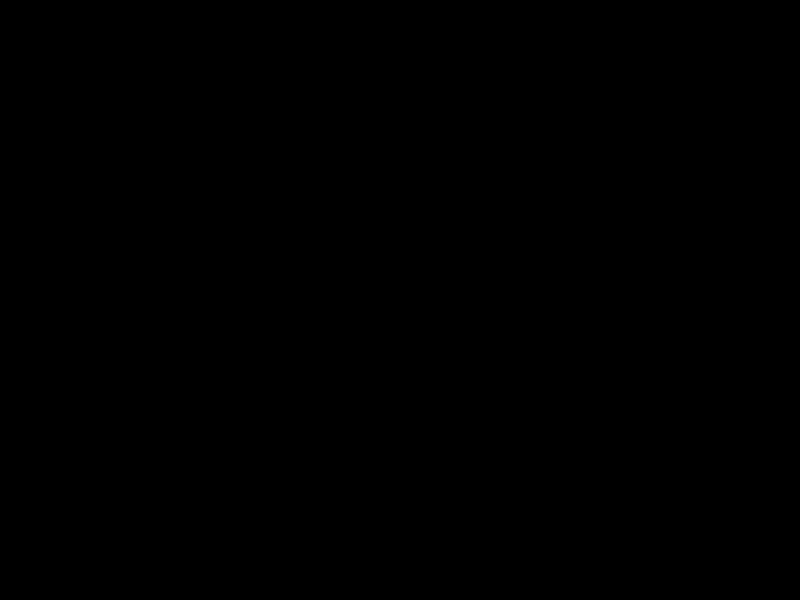

In [488]:
line_chart

We can see there are a lot of 'filler' words that definitely aren't informative of our text.
A comma might be evenly distributed throughout the text, but it's definitely not informative.

By contrast, we can look at the rarely occuring words:

In [489]:
freq_dist_alice.hapaxes()[:10]

['Brandy',
 'fix',
 'died',
 'salmon',
 'Laughing',
 'scrambling',
 'jelly',
 'curtain',
 'expression',
 'wept']

Still not very informative.


Instead we can filter our set of words, say, we only want them if they have a higher frequency distribution, and that they're longer words:

In [490]:
new_chart = pygal.Bar()

for w in set(alice):
    if len(w) > 6 and freq_dist_alice[w] > 7:
        new_chart.add(w, freq_dist_alice[w])

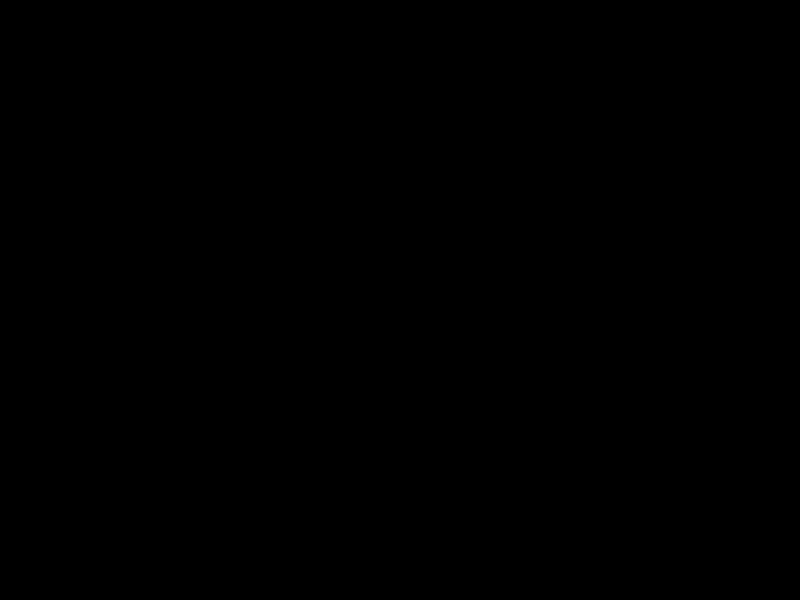

In [491]:
new_chart

That's far more representative of our text

### Part of Speech Tagging

POS tagging is assigning a 'tag' to a token
our tags include verbs, adjectives, nouns, proper nouns...
there are various conventions for tagging
nltk uses the penn treebank tag set, which you can find a full list for here 
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [492]:
text = word_tokenize(
    "Begin at the beginning,\" the King said, very gravely, \"and go on till you come to the end: then stop.")
nltk.pos_tag(text)

[('Begin', 'VB'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('beginning', 'NN'),
 (',', ','),
 ("''", "''"),
 ('the', 'DT'),
 ('King', 'NNP'),
 ('said', 'VBD'),
 (',', ','),
 ('very', 'RB'),
 ('gravely', 'RB'),
 (',', ','),
 ('``', '``'),
 ('and', 'CC'),
 ('go', 'VB'),
 ('on', 'IN'),
 ('till', 'NN'),
 ('you', 'PRP'),
 ('come', 'VBP'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('end', 'NN'),
 (':', ':'),
 ('then', 'RB'),
 ('stop', 'VB'),
 ('.', '.')]

Looking at which POS tags in Alice in wonderland are the most common

In [493]:
alice_tagged = nltk.pos_tag(alice)
fd = FreqDist(alice_tagged)
fd_tagged = FreqDist(tag for (word, tag) in alice_tagged)
fd_tagged.most_common(10)

[('NN', 3435),
 ('IN', 2994),
 ('DT', 2901),
 ('PRP', 2714),
 ('NNP', 2480),
 ('VBD', 2465),
 (',', 1993),
 ('RB', 1916),
 ('JJ', 1693),
 ("''", 1294)]

We could now look at the top proper nouns in our text

In [494]:
[w[0] for (w, _) in fd.most_common() if w[1] == 'NNP'][:10]

['Alice', ",'", "!'", ".'", "?'", 'Queen', 'King', 'Turtle', 'Mock', 'Gryphon']

Point out flaws in NLTK's POS tagging

## Sentiment Projects

### Rule Based Sentiment Analysis

this example will use most if not all of the concepts discussed in the previous section

In [495]:
reviews = [
    'Civil War is fun. It\'s smart. It\'s coherent. And, most importantly, it allows its heart to beat strongly amid the chaos, with character moments and set pieces working in tandem to create perhaps Marvel\'s best film so far.',
    'Not the best Marvel movie, but does do the best job balancing its obligations, while also boasting the series\' best action sequence (Splice Today)',
    'This satisfying adventure is rich with the things Marvel comics always did best: critiquing the consequences of power in explosive, four-color form.',
    'Very entertaining, and a far tighter production than much of Marvel\'s recent output.',
    'If you\'re a cloak and dagger enthusiast, you won\'t be disappointed. Even if you aren\'t, it\'s still very entertaining.',
    'While you could argue that the film is slightly too long, and that Walker reads too much into things that feel inconsequential, it remains a fascinating look into an unrecognised slice of Australian history.',
    'The show is nothing more than a soap with good music but it has a sense of humor often enough to keep me entertained.',
    'There are about six really good laughs during the film\'s 92-minute running length.',
    'A thorough disappointment.',
    'Dying is easy. Comedy is hard. But comedy sequels are apparently the greatest challenge of all.',
    'X-Men: Apocalypse provides a hint at what might one day take down the ubiquitous superhero genre: utter dullness. For all its bangs, the movie is ultimately a whimper.',
    'The problem with “Alice” is its lack of narrative imagination',
]

In [496]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()

def tag_review(review):
    # split into tokens
    tokenized_review = tokenizer.tokenize(review)
    # pos tag our tokens
    pos_tagged_tokens = nltk.pos_tag(tokenized_review)
    return pos_tagged_tokens

tagged_review = tag_review(reviews[0])
print(tagged_review)

[('Civil', 'NNP'), ('War', 'NNP'), ('is', 'VBZ'), ('fun.', 'JJ'), ('It', 'PRP'), ("'s", 'VBZ'), ('smart.', 'JJ'), ('It', 'PRP'), ("'s", 'VBZ'), ('coherent.', 'NN'), ('And', 'CC'), (',', ','), ('most', 'RBS'), ('importantly', 'RB'), (',', ','), ('it', 'PRP'), ('allows', 'VBZ'), ('its', 'PRP$'), ('heart', 'NN'), ('to', 'TO'), ('beat', 'VB'), ('strongly', 'RB'), ('amid', 'IN'), ('the', 'DT'), ('chaos', 'NN'), (',', ','), ('with', 'IN'), ('character', 'NN'), ('moments', 'NNS'), ('and', 'CC'), ('set', 'NN'), ('pieces', 'NNS'), ('working', 'VBG'), ('in', 'IN'), ('tandem', 'NN'), ('to', 'TO'), ('create', 'VB'), ('perhaps', 'RB'), ('Marvel', 'NNP'), ("'s", 'POS'), ('best', 'JJS'), ('film', 'NN'), ('so', 'RB'), ('far', 'RB'), ('.', '.')]


now we'll make up a list of positive and negative tokens

these are our 'rules' which we match to

In [497]:
pos = ['nice', 'brilliant', 'good', 'great', 'excellent', 'entertain', 'funny', 'cool', 'best', 'fun']
neg = ['bad', 'gross', 'disappointed', 'poor', 'terrible', 'crass', 'boring', 'uninspiring', 'disappoint']

Now we'll classify our text with the rules

In [498]:
review = reviews[3]

score = 0
tagged_review = tag_review(review)
for token, tag in tagged_review:
    if token.strip() in pos:
        score +=1
    if token.strip() in neg:
        score -=1

print(review)
print(score)
print('\n')

Very entertaining, and a far tighter production than much of Marvel's recent output.
0




Adding a Lemmatizer and using the POS tags

In [499]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

wordnet_lemmatizer = WordNetLemmatizer()

review = reviews[3]

score = 0
tagged_review = tag_review(review)
for token, tag in tagged_review:
    if tag in ['JJ', 'JJR', 'JJS']:
        lemmatized_token = wordnet_lemmatizer.lemmatize(token, wordnet.ADJ)
        lemmatized_token_2 = wordnet_lemmatizer.lemmatize(token, wordnet.VERB)
        
        if lemmatized_token_2 in pos or lemmatized_token in pos:
            score +=1
        if lemmatized_token in neg or lemmatized_token_2 in neg:
            score -=1
    
print(review)
print(score)
print('\n')

Very entertaining, and a far tighter production than much of Marvel's recent output.
1




We could consider increments in our classification, so we can weight things when they are 

In [500]:
incrementers = ['really', 'very', 'too']

review = reviews[3]

score = 0
tagged_review = tag_review(review)
for i, pair in enumerate(tagged_review):
    token = pair[0]
    tag = pair[1]
    prev_tag = tagged_review[i-1][0]
    
    if tag in ['JJ', 'JJR', 'JJS']:
        lemmatized_token = wordnet_lemmatizer.lemmatize(token, wordnet.VERB)
        
        if lemmatized_token in pos:
            if prev_tag.lower() in incrementers:
                score +=1
            score +=1
        if lemmatized_token in neg:
            if prev_tag.lower() in incrememnters:
                score +=1
            score -=1
    
print(review)
print(score)
print('\n')

Very entertaining, and a far tighter production than much of Marvel's recent output.
2




Additional Ideas:
- add modifiers for things like 'not'
- add decrements to the classification (e.g. 'little')

This is a really simple example of how you can implement a rule based algorithm

This approach is beneficial because it's easy to see what's going on in your data
you can easily explain when things don't work, e.g. we couldn't classify it as positive because we 
didn't have 'gr8' in our ruleset. you then just add it

drawbacks of rule based approach
- overfitting 
- intense to make, lots of tweaking, making sure you have the right rules

### Naive Bayes Sentiment Analysis

NB is a supervised classifier
a supervised classifier learns from tagged data you supply it with, which is usually called 'training data'

NB learns features and then predicts the class of something by looking for the occurence of those features

not going to go into loads of detail, as I just want to show how easy it is, and get a rough idea
of what to do

First we need to read in our data, and then format it to how we want it

In [501]:
from nltk.classify import NaiveBayesClassifier

negative = []
positive = []

with open('sts_gold_tweet.csv', 'r') as f:
    reader = csv.reader(f, delimiter=';')
    for row in reader:
        _, polarity, tweet = row
        if polarity == '4':
            positive.append((tweet, 'positive'))
        elif polarity == '0':
            negative.append((tweet, 'negative'))

negative_training = negative[:500]
negative_testing = negative[100:]

positive_training = positive[:500]
positive_testing = positive[100:]

Now our tweets look like this

In [502]:
print(negative_training[0])
print(positive_training[0])

('the angel is going to miss the athlete this weekend ', 'negative')
('@ mcdonalds with my litto sis aka cuzin lol cristyyyyy ', 'positive')


Dataset: http://www.tweenator.com/index.php?page_id=13

Now we split our tweets up into tokens, removing any 'small' words
We now have a 'bag of words' for each tweet, still with its sentiment assigned to it

In [503]:
tweets = []
for words, sentiment in positive_training + negative_training:
    filtered_words = [w.lower() for w in words.split() if len(w) >= 3]
    tweets.append((filtered_words, sentiment))

print(tweets[0])

(['mcdonalds', 'with', 'litto', 'sis', 'aka', 'cuzin', 'lol', 'cristyyyyy'], 'positive')


Now we have an 'actual' bag of words, for all the tweets

In [504]:
def get_words(tweets):
    all_tweets = []
    for (words, sentiment) in tweets:
        all_tweets += words
    return all_tweets

wordlist = get_actual_tweets(tweets)

Build a feature extractor, this extracts which features are in the input you passed in
Here's an example

In [505]:
word_features = nltk.FreqDist(wordlist).keys()

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

print(positive_testing[1])
extract_features(positive_testing[1])

("All rockstars are back home: while 'some of us' freshen up, 'others' watch Magic/Lakers game, then we'll celebrate Sweden Rock in Florida ", 'positive')


{'contains(ugly)': False,
 'contains(too!!!)': False,
 'contains(hi!)': False,
 'contains(now,)': False,
 'contains(lights.&quot;)': False,
 'contains(spring)': False,
 'contains(epic)': False,
 'contains(babe)': False,
 'contains(&quot;hey)': False,
 'contains(july)': False,
 'contains(sydney...)': False,
 'contains(*hugs*)': False,
 'contains(@ninaland)': False,
 'contains(must)': False,
 'contains(birhtday,)': False,
 'contains(@guardiantech)': False,
 'contains(shud)': False,
 'contains(samro)': False,
 'contains(lakers.)': False,
 'contains(hydrogen)': False,
 'contains(found)': False,
 'contains(brian)': False,
 'contains(yes)': False,
 'contains(haha!)': False,
 'contains(thinks:)': False,
 'contains(game,)': False,
 'contains(green)': False,
 'contains(keeps!)': False,
 'contains(gunna)': False,
 'contains(music,)': False,
 'contains(hosting)': False,
 'contains(convergence)': False,
 'contains(okay;)': False,
 'contains(interferes.)': False,
 'contains(did!)': False,
 'contain

In [506]:
training_set = nltk.classify.apply_features(extract_features, tweets)

We can now create our NB classifier, using the training set we built

In [507]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [515]:
classifier.show_most_informative_features()

Most Informative Features
        contains(cancer) = True           negati : positi =     12.3 : 1.0
          contains(love) = True           positi : negati =     10.3 : 1.0
         contains(great) = True           positi : negati =      8.2 : 1.0
         contains(sorry) = True           negati : positi =      7.7 : 1.0
          contains(been) = True           negati : positi =      7.0 : 1.0
          contains(best) = True           positi : negati =      7.0 : 1.0
          contains(miss) = True           negati : positi =      6.6 : 1.0
          contains(lost) = True           negati : positi =      6.6 : 1.0
          contains(haha) = True           positi : negati =      6.3 : 1.0
        contains(thanks) = True           positi : negati =      6.2 : 1.0


Now let's classify some tweets using the testing data we put aside at the beginning

In [508]:
pos_tweet = positive_testing[0][0]
print(pos_tweet)
print(classifier.classify(extract_features(pos_tweet.split())))

print('\n')

neg_tweet = negative_testing[0][0]
print(neg_tweet)
print(classifier.classify(extract_features(neg_tweet.split())))

http://twitpic.com/5oll7 - We are on board....The Mini stored with the other Minis.... England here we come! 
positive


exhausted and I have a brutal headache 
negative


- it's fast!
- easy to train 
- not sensitive to irrelevant features

- NB is great if you have a large dataset, but struggles otherwise
- if your data is all v different, will also struggle
- hard to explain when it goes wrong
- it thinks all features are independent

### A Little More

Exploring sentiment that co-occurs with smileys using the NB classifier we've already built

In [509]:
tweets1 = pickle.load(open("tweets.p", "rb"))
tweets2 = pickle.load(open("tweets2.p", "rb"))
tweets3 = pickle.load(open("tweets3.p", "rb"))

tweets = tweets1 + tweets2 + tweets3


In [510]:
import re
from collections import defaultdict

negative_emoji = defaultdict(int)
positive_emoji = defaultdict(int)

for tweet in tweets:
    try:
        ranges = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
        ranges = re.compile(u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    
    emoji = (ranges.findall(tweet))
    
    if emoji:
        classified_tweet = classifier.classify(extract_features(tweet.split()))
        for curr_emoji in emoji:
            std, current, _  = curr_emoji  # update to also consider std
            if classified_tweet == 'positive':
                positive_emoji[current] += 1
            elif classified_tweet == 'negative':
                negative_emoji[current] += 1

In [511]:
print(negative_emoji)
print('\n')
print(positive_emoji)

defaultdict(<class 'int'>, {'': 38, '💥': 1, '\U0001f3fe': 5, '😈': 4, '🙏': 3, '🍀': 3, '💔': 3, '😠': 2, '🐭': 6, '🔥': 7, '😉': 2, '👎': 1, '🍴': 1, '🎈': 1, '😢': 2, '😅': 2, '😭': 39, '💪': 1, '😋': 1, '💆': 1, '💁': 1, '👭': 1, '😒': 4, '😊': 12, '🎶': 1, '\U0001f3fd': 2, '😛': 1, '🙌': 2, '\U0001f643': 1, '😏': 1, '😝': 1, '🍯': 2, '🎣': 1, '🙈': 1, '📷': 2, '👀': 3, '😂': 40, '👨': 1, '💖': 9, '😞': 3, '💋': 1, '🍷': 1, '🎥': 1, '😔': 1, '👅': 3, '🐸': 1, '😍': 20, '🎉': 2, '\U0001f3fb': 4, '😁': 1, '😘': 5, '🍻': 1, '💃': 1, '👑': 1, '🎀': 1, '😴': 4, '🎩': 1, '💜': 2, '😄': 1, '🌞': 1, '😫': 1, '💇': 1, '🏃': 3, '👌': 4, '💦': 2, '😲': 1, '🙅': 4, '😀': 3, '🌟': 1, '🐶': 1, '\U0001f644': 1, '😬': 1, '🐷': 1, '😎': 1, '💀': 3, '😷': 1, '💐': 2, '👍': 2, '💛': 2, '😩': 9, '💕': 2, '💗': 1, '\U0001f3ff': 2, '💯': 2, '👮': 1, '\U0001f3fc': 2, '🍰': 1, '😡': 1, '👿': 1, '🎵': 1, '🐰': 1, '😜': 4, '🌸': 1, '👠': 1})


defaultdict(<class 'int'>, {'': 35, '🎉': 15, '🏈': 2, '\U0001f3fb': 1, '😁': 1, '👏': 7, '💚': 1, '😘': 6, '🌻': 1, '😍': 12, '💙': 8, '😂': 16, '💃': 1, '📷': 1

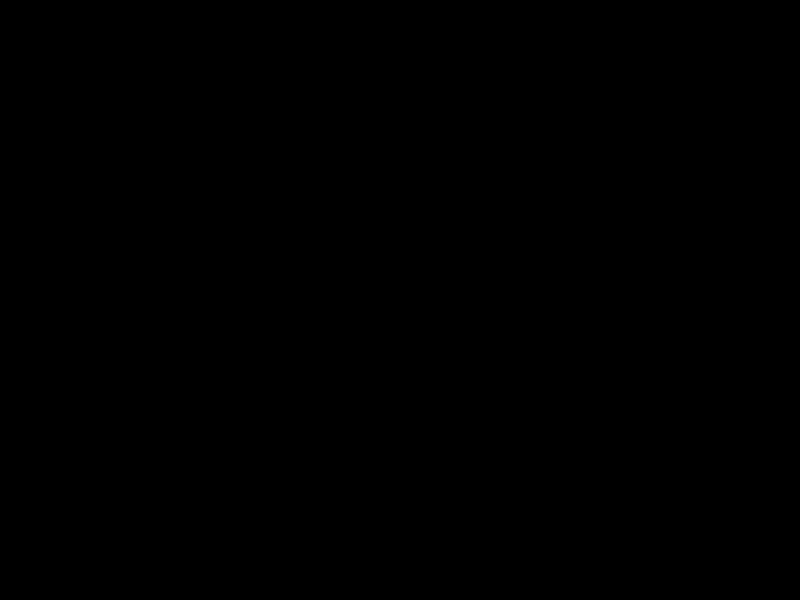

In [512]:
emoji_chart = pygal.StackedBar()

x_axis = []
neg_emoji_values = []
pos_emoji_values = []
for emoji, neg_count in negative_emoji.items():
    for emoji_2, pos_count in positive_emoji.items():
        if emoji == emoji_2:
            if neg_count and pos_count <= 5:
                continue
            if emoji is '':
                continue
            x_axis.append(emoji)
            neg_emoji_values.append(neg_count)
            pos_emoji_values.append(pos_count)

emoji_chart.x_labels = x_axis

emoji_chart.add('Negative', neg_emoji_values)
emoji_chart.add('Positive', pos_emoji_values)

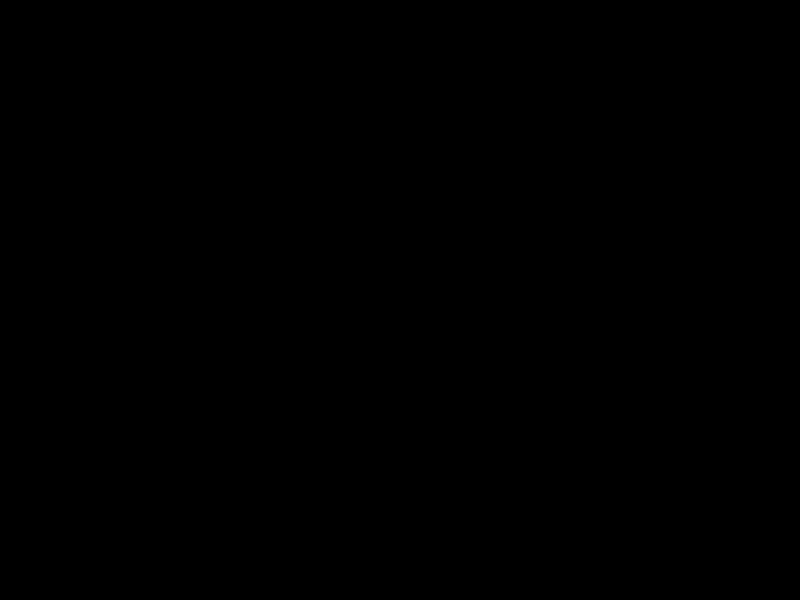

In [513]:
emoji_chart

# Beyond NLTK & Tying Things Up

That was an introduction to NLP, whilst it's a very broad topic, I hope that this has shown that it can be a fun 
topic, which isn't too intimidating or hard to pick up. You can easily do a small little project, and work
with building blocks.

But there's also so much more! There's lots going on at the moment.

My favourite recent NLP library in Python is spaCy. It's open source, and in active development. It features a tokenizer, POS tagger and a Named Entity Recogniser.

You also probably heard of "Parsey McParseface" in the news lately; Google's recent dependency parsing library.

Also other big libraries such as scikit learn, which implement various NLP algorithms and are often faster than NLTK.

# Links to Slides & Code

https://github.com/jessbrandwatch/intro-to-nlp/blob/master/notes.ipynb